<a href="https://colab.research.google.com/github/quicksilverTrx/NLP_notebooks/blob/main/2_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

## Frequency of words in a file
Now we will read a sample chat file and then try to find the frequency of words in it.

In [17]:
!git clone https://github.com/quicksilverTrx/NLP_notebooks

fatal: destination path 'NLP_notebooks' already exists and is not an empty directory.


In [18]:
%matplotlib inline
import string
import matplotlib.pyplot as plt
import nltk
f=open('/content/NLP_notebooks/data/Tokenization/Chat1.txt','r')
content=f.read()
wordlist=string.split(content)

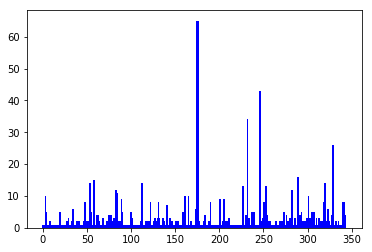

In [19]:
wordset=set(wordlist)
y=[]
for item in wordset:
    y.append(wordlist.count(item))
#print y
N = len(y)
x = range(N)
width = 1/0.5
plt.bar(x, y, width, color="blue")
plt.show()


## Lowercasing all words

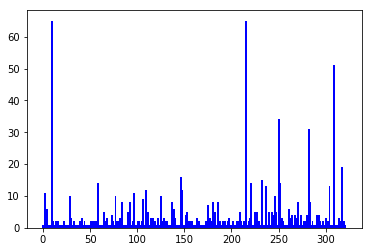

In [20]:
i=0
for word1 in wordlist:
    wordlist[i]=word1.lower()
    i=i+1    
wordset=set(wordlist)
y=[]
for item in wordset:
    y.append(wordlist.count(item))
N = len(y)
x = range(N)
width = 1/0.5
plt.bar(x, y, width, color="blue")
plt.show()


## LowerCase And Removal of Punctuation Marks

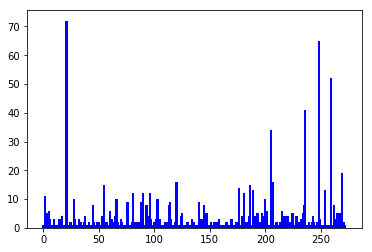

In [21]:
i=0
for word1 in wordlist:
    wordlist[i]=word1.lower()
    #Takes Care of Multiple Punctuation Marks
    wordlist[i]=word1.replace('.','').replace(',','').replace(':','').replace(';','').replace('!','').replace('?','').replace('(','').replace(')','')      
    i=i+1    
wordset=set(wordlist)
y=[]
for item in wordset:
    y.append(wordlist.count(item))
N = len(y)
x = range(N)
width = 1/0.5
plt.bar(x, y, width, color="blue")
plt.show()


## Noise Removal (slangs used in chat/message)
Examples covered patterns like hhhhhhh, yeah|yup -> yes, u -> you, gr8 -> great

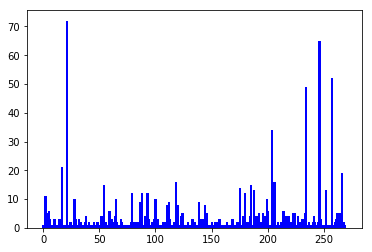

In [22]:
import re
i=0
for word1 in wordlist:
    wordlist[i]=word1.lower()
    wordlist[i]=word1.replace('.','').replace(',','').replace(':','').replace(';','').replace('!','').replace('?','').replace('(','').replace(')','')       
    searchObj= re.search(r'aaa+|bbb+|ccc+|ddd+|eee+|fff+|ggg+|hhh+|iii+|jjj+|kkk+|lll+|mmm+|nnn+|ooo+|ppp+|qqq+|rrr+|sss+|ttt+|uuu+|vvv+|www+|xxx+|yyy+|zzz+',word1,re.M|re.I)
    if searchObj:
        strpattern=searchObj.group()
        wordlist[i]=word1.replace(strpattern,strpattern[0])
    searchObj=re.search(r'yeah|yup',word1,re.M|re.I)
    if searchObj:
        wordlist[i]=word1.replace(searchObj.group(),"yes")
    if(word1=="gr8"):
        wordlist[i]="great"  
    if(word1=="u"):
        wordlist[i]="you"
    i=i+1   
wordset=set(wordlist)
y=[]
for item in wordset:
    y.append(wordlist.count(item))
N = len(y)
x = range(N)
width = 1/0.5
plt.bar(x, y, width, color="blue")
plt.show()

## Using NLTK 

In [23]:
import nltk
nltk.download("book")
# A GUI window will appear
# GO to 'collections' tab, and doubleclick on "Everything used in NLTK book"

[nltk_data] Downloading collection u'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Download

True

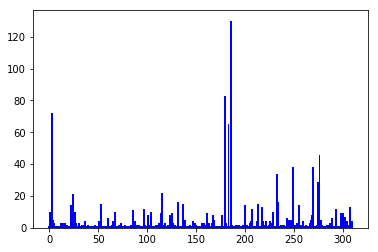

In [24]:
wordlist = nltk.word_tokenize(content)
wordset=set(wordlist)
y=[]
for item in wordset:
    y.append(wordlist.count(item))
N = len(y)
x = range(N)
width = 1/0.5
plt.bar(x, y, width, color="blue")
plt.show()


## Using NLTK on a proper dataset from gutenberg corpus

In [42]:
print(nltk.corpus.gutenberg.fileids()[0])
print(nltk.corpus.gutenberg.fileids()[1])
book1=nltk.corpus.gutenberg.fileids()[0]
book2=nltk.corpus.gutenberg.fileids()[1]

austen-emma.txt
austen-persuasion.txt


In [26]:
content = nltk.corpus.gutenberg.raw(nltk.corpus.gutenberg.fileids()[0])

In [38]:
print("Type of Content ", type(content))
print("Length of File ",len(content))

('Type of Content ', <type 'unicode'>)
('Length of File ', 887071)


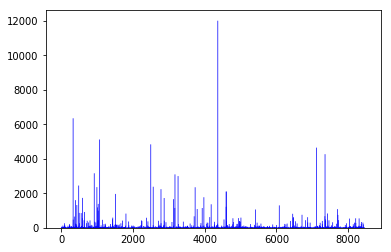

In [31]:
awordlist = nltk.word_tokenize(content)
wordset=set(wordlist)
y=[]
for item in wordset:
    y.append(wordlist.count(item))
N = len(y)
x = range(N)
width = 20
plt.bar(x, y, width, color="blue",snap= False )
plt.show()


## Using Stemmer

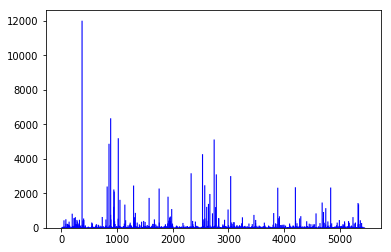

In [40]:
def stemmer(content):
  porter = nltk.PorterStemmer()
  wordlist = nltk.word_tokenize(content)
  i=0
  for word1 in wordlist:
      wordlist[i]=porter.stem(word1)
      i=i+1
  #print wordlist
  wordset=set(wordlist)
  y=[]
  for item in wordset:
      y.append(wordlist.count(item))
  N = len(y)
  x = range(N)
  width = 20
  plt.bar(x, y, width, color="blue",snap= False )
  plt.show()
stemmer(content)

## Using WordnetLemmatizer

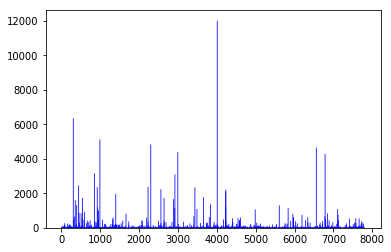

In [39]:
def lemmatize(content):
  wordlist = nltk.word_tokenize(content)
  wnl = nltk.WordNetLemmatizer()
  i=0
  for word1 in wordlist:
    wordlist[i]= wnl.lemmatize(word1)
    i=i+1
  wordset=set(wordlist)
  y=[]
  for item in wordset:
      y.append(wordlist.count(item))
  N = len(y)
  x = range(N)
  width = 20
  plt.bar(x, y, width, color="blue",snap= False )
  plt.show()
lemmatize(content)



 1. Can you compare the time comparision between lemmatisation and stemming using timeit magic for datasets of varying sizes?
 2. Can you comapre the vocabulary sizes between different datasets ?

In [43]:
print(nltk.corpus.gutenberg.fileids()[0])
print(nltk.corpus.gutenberg.fileids()[1])
book1=nltk.corpus.gutenberg.fileids()[0]
book2=nltk.corpus.gutenberg.fileids()[1]

austen-emma.txt
austen-persuasion.txt


('Length of Book', u'austen-emma.txt', 887071)
('Length of Book', u'austen-persuasion.txt', 466292)


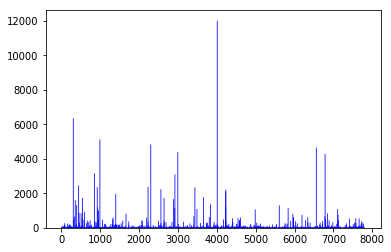

1 loop, best of 1: 42.6 s per loop


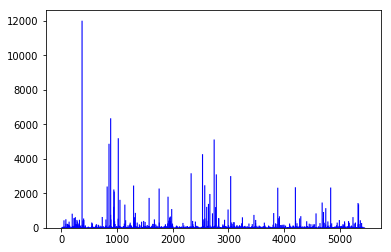

1 loop, best of 1: 32.4 s per loop


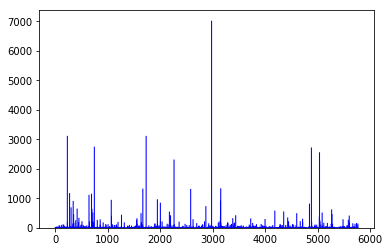

1 loop, best of 1: 19.9 s per loop


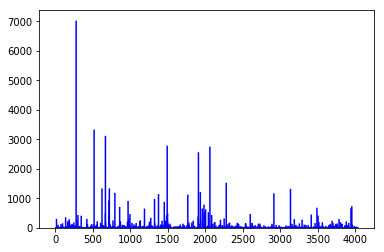

1 loop, best of 1: 15.2 s per loop


In [49]:
content1 = nltk.corpus.gutenberg.raw(book1)
content2 = nltk.corpus.gutenberg.raw(book2)
print("Length of Book",nltk.corpus.gutenberg.fileids()[0],len(content1))
print("Length of Book",nltk.corpus.gutenberg.fileids()[1],len(content2))
%timeit -n 1 -r 1 lemmatize(content1)
%timeit -n 1 -r 1 stemmer(content1)
%timeit -n 1 -r 1 lemmatize(content2)
%timeit -n 1 -r 1 stemmer(content2)

## References
NLTK Book http://www.nltk.org/book/

